# Setup Environment

## Load Python Modules

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_fscore_support
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch
import matplotlib.pyplot as plt
import os
from image import *
from CNN import *
from ViT import *
import util
from transformers import ViTImageProcessor, ViTForImageClassification
%load_ext autoreload
%autoreload 2

## Show NVIDIA GPU

In [2]:
!nvidia-smi -L

GPU 0: NVIDIA H200 (UUID: GPU-c9a90d86-6051-94af-3c4b-eaf6a371897b)
GPU 1: NVIDIA H200 (UUID: GPU-d5d905bd-30a2-3558-dddf-ee4b4cd90a90)


## Setup utility

In [3]:
util.setup_logger()

# Load and Process Dataset

## Load Dataset

In [4]:
folder_path = os.path.join(os.getenv("HOME"), "scratch")
# train_dataset = ImageDataset(os.path.join(folder_path, "train_80p.csv"), use_augmentation=False)
# valid_dataset = ImageDataset(os.path.join(folder_path, "validation_10p.csv"), use_augmentation=False)
# test_dataset  = ImageDataset(os.path.join(folder_path, "test_10p.csv"), use_augmentation=False)

# folder_path = "../kaggle/input/ai-vs-human-generated-dateset/"
# train_dataset = ImageDataset(os.path.join(folder_path, "train.csv"), use_augmentation=True)
# valid_dataset = ImageDataset(os.path.join(folder_path, "train.csv"), use_augmentation=False)
# test_dataset  = ImageDataset(os.path.join(folder_path, "train.csv"), use_augmentation=False)
train_dataset = ImageDataset(os.path.join(folder_path, "train_80p.csv"), use_augmentation=False, model="ViT")
valid_dataset = ImageDataset(os.path.join(folder_path, "validation_10p.csv"), use_augmentation=False, model="ViT")
test_dataset  = ImageDataset(os.path.join(folder_path, "test_10p.csv"), use_augmentation=False, model="ViT")

## Check Dataset

In [5]:
train_dataset.check()

There are 0 missing values
31980 images with label 0, and 31980 with label 1.
All filenames end with .jpg


## (Optional) Show image for verification

Label: 0, shape: torch.Size([3, 656, 768])


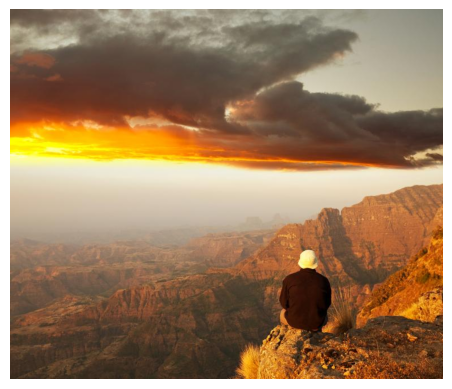

Label: 1, shape: torch.Size([3, 496, 768])


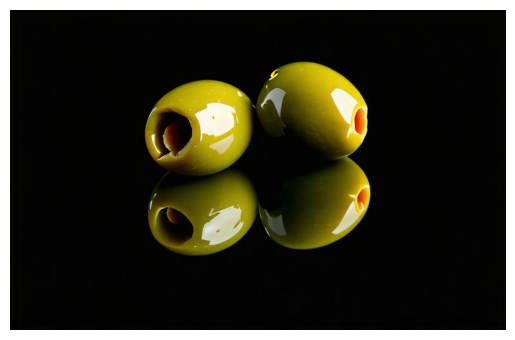

In [6]:
train_dataset.show_image()

## (Optional) Show normalized images

In [7]:
# dataset.show_image(transform=True)

# ViT Model

## Create Torch Data Loaders

In [6]:
# train_loader, valid_loader, test_loader = dataset.get_loaders()
batch_size = 64
train_loader = train_dataset.get_loader(batch_size=batch_size)
valid_loader = valid_dataset.get_loader(batch_size=batch_size)
test_loader  = test_dataset.get_loader(batch_size=batch_size)

## Check CUDA Availability

In [7]:
# "cuda" only when GPUs are available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Training Setup

In [10]:
_exp_name = "ViT_test"
# The number of training epochs and patience.
n_epochs = 100
patience = 30 # If no improvement in 'patience' epochs, early stop

# Initialize a model, and put it on the device specified.
model, train_losses, valid_losses = try_load_model_ViT(_exp_name)
if model == None:
    # Load feature extractor and model
    model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224').to(device)

feature_extractor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
# For the classification task, we use cross-entropy as the measurement of performance.
criterion = nn.CrossEntropyLoss()

# Initialize optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.003, weight_decay=1e-5)

[INFO] Model loaded from ViT_test_best.ckpt, loss loaded from ViT_test_loss.pkl, trained for 1 epochs


## Training

In [ ]:
train_ViT(model, optimizer, train_loader, valid_loader, n_epochs=n_epochs, patience=patience,
            criterion=nn.CrossEntropyLoss(), train_losses = train_losses, valid_losses = valid_losses,
            prefix = _exp_name, feature_extractor=feature_extractor)

100%|██████████| 125/125 [03:04<00:00,  1.47s/it]


[ Valid | 001/100 ] loss = 0.39415, acc = 0.83137
[ Valid | 001/100 ] loss = 0.39415, acc = 0.83137 -> best


100%|██████████| 1000/1000 [23:16<00:00,  1.40s/it]


[ Train | 002/100 ] loss = 0.31600, acc = 0.86824


100%|██████████| 125/125 [00:43<00:00,  2.89it/s]


[ Valid | 002/100 ] loss = 0.25286, acc = 0.89176
[ Valid | 002/100 ] loss = 0.25286, acc = 0.89176 -> best
Epoch 2 duration: 1440.05 seconds
Best model found at epoch 1, saving model


100%|██████████| 1000/1000 [07:52<00:00,  2.12it/s]


[ Train | 003/100 ] loss = 0.26601, acc = 0.89171


100%|██████████| 125/125 [00:43<00:00,  2.90it/s]


[ Valid | 003/100 ] loss = 0.24799, acc = 0.89484
[ Valid | 003/100 ] loss = 0.24799, acc = 0.89484 -> best
Epoch 3 duration: 515.09 seconds
Best model found at epoch 2, saving model


100%|██████████| 1000/1000 [07:53<00:00,  2.11it/s]


[ Train | 004/100 ] loss = 0.24986, acc = 0.89742


100%|██████████| 125/125 [00:44<00:00,  2.78it/s]


[ Valid | 004/100 ] loss = 0.25450, acc = 0.89680
[ Valid | 004/100 ] loss = 0.25450, acc = 0.89680 -> best
Epoch 4 duration: 518.23 seconds
Best model found at epoch 3, saving model


100%|██████████| 1000/1000 [07:40<00:00,  2.17it/s]


[ Train | 005/100 ] loss = 0.23241, acc = 0.90707


100%|██████████| 125/125 [00:43<00:00,  2.90it/s]


[ Valid | 005/100 ] loss = 0.21956, acc = 0.91030
[ Valid | 005/100 ] loss = 0.21956, acc = 0.91030 -> best
Epoch 5 duration: 503.22 seconds
Best model found at epoch 4, saving model


100%|██████████| 1000/1000 [07:40<00:00,  2.17it/s]


[ Train | 006/100 ] loss = 0.22500, acc = 0.90940


100%|██████████| 125/125 [00:44<00:00,  2.81it/s]


[ Valid | 006/100 ] loss = 0.22561, acc = 0.90554
[ Valid | 006/100 ] loss = 0.22561, acc = 0.90554
Epoch 6 duration: 505.39 seconds


100%|██████████| 1000/1000 [07:36<00:00,  2.19it/s]


[ Train | 007/100 ] loss = 0.21889, acc = 0.91159


100%|██████████| 125/125 [00:43<00:00,  2.86it/s]


[ Valid | 007/100 ] loss = 0.24626, acc = 0.89590
[ Valid | 007/100 ] loss = 0.24626, acc = 0.89590
Epoch 7 duration: 500.25 seconds


100%|██████████| 1000/1000 [07:42<00:00,  2.16it/s]


[ Train | 008/100 ] loss = 0.21338, acc = 0.91345


100%|██████████| 125/125 [00:44<00:00,  2.82it/s]


[ Valid | 008/100 ] loss = 0.23227, acc = 0.90484
[ Valid | 008/100 ] loss = 0.23227, acc = 0.90484
Epoch 8 duration: 506.28 seconds


100%|██████████| 1000/1000 [07:43<00:00,  2.16it/s]


[ Train | 009/100 ] loss = 0.20636, acc = 0.91732


100%|██████████| 125/125 [00:43<00:00,  2.89it/s]


[ Valid | 009/100 ] loss = 0.26423, acc = 0.88738
[ Valid | 009/100 ] loss = 0.26423, acc = 0.88738
Epoch 9 duration: 506.86 seconds


100%|██████████| 1000/1000 [07:41<00:00,  2.17it/s]


[ Train | 010/100 ] loss = 0.19666, acc = 0.92195


100%|██████████| 125/125 [00:45<00:00,  2.77it/s]


[ Valid | 010/100 ] loss = 0.22396, acc = 0.90533
[ Valid | 010/100 ] loss = 0.22396, acc = 0.90533
Epoch 10 duration: 506.69 seconds


100%|██████████| 1000/1000 [07:46<00:00,  2.15it/s]


[ Train | 011/100 ] loss = 0.19604, acc = 0.92029


100%|██████████| 125/125 [00:45<00:00,  2.74it/s]


[ Valid | 011/100 ] loss = 0.18375, acc = 0.93081
[ Valid | 011/100 ] loss = 0.18375, acc = 0.93081 -> best
Epoch 11 duration: 511.65 seconds
Best model found at epoch 10, saving model


100%|██████████| 1000/1000 [07:44<00:00,  2.15it/s]


[ Train | 012/100 ] loss = 0.18743, acc = 0.92517


100%|██████████| 125/125 [00:48<00:00,  2.60it/s]


[ Valid | 012/100 ] loss = 0.19274, acc = 0.92083
[ Valid | 012/100 ] loss = 0.19274, acc = 0.92083
Epoch 12 duration: 512.97 seconds


100%|██████████| 1000/1000 [08:05<00:00,  2.06it/s]


[ Train | 013/100 ] loss = 0.18713, acc = 0.92512


100%|██████████| 125/125 [00:49<00:00,  2.50it/s]


[ Valid | 013/100 ] loss = 0.18161, acc = 0.92923
[ Valid | 013/100 ] loss = 0.18161, acc = 0.92923
Epoch 13 duration: 535.69 seconds


100%|██████████| 1000/1000 [08:09<00:00,  2.04it/s]


[ Train | 014/100 ] loss = 0.18252, acc = 0.92627


100%|██████████| 125/125 [00:46<00:00,  2.66it/s]


[ Valid | 014/100 ] loss = 0.19753, acc = 0.91907
[ Valid | 014/100 ] loss = 0.19753, acc = 0.91907
Epoch 14 duration: 536.06 seconds


100%|██████████| 1000/1000 [08:01<00:00,  2.08it/s]


[ Train | 015/100 ] loss = 0.17903, acc = 0.92863


100%|██████████| 125/125 [00:45<00:00,  2.75it/s]


[ Valid | 015/100 ] loss = 0.17701, acc = 0.92935
[ Valid | 015/100 ] loss = 0.17701, acc = 0.92935
Epoch 15 duration: 526.95 seconds


100%|██████████| 1000/1000 [08:01<00:00,  2.08it/s]


[ Train | 016/100 ] loss = 0.17498, acc = 0.93060


100%|██████████| 125/125 [00:48<00:00,  2.58it/s]


[ Valid | 016/100 ] loss = 0.17524, acc = 0.92658
[ Valid | 016/100 ] loss = 0.17524, acc = 0.92658
Epoch 16 duration: 530.03 seconds


100%|██████████| 1000/1000 [08:09<00:00,  2.04it/s]


[ Train | 017/100 ] loss = 0.17220, acc = 0.93092


100%|██████████| 125/125 [00:45<00:00,  2.74it/s]


[ Valid | 017/100 ] loss = 0.17795, acc = 0.93071
[ Valid | 017/100 ] loss = 0.17795, acc = 0.93071
Epoch 17 duration: 534.87 seconds


100%|██████████| 1000/1000 [07:54<00:00,  2.11it/s]


[ Train | 018/100 ] loss = 0.17228, acc = 0.93178


100%|██████████| 125/125 [00:44<00:00,  2.80it/s]


[ Valid | 018/100 ] loss = 0.17690, acc = 0.92870
[ Valid | 018/100 ] loss = 0.17690, acc = 0.92870
Epoch 18 duration: 518.78 seconds


100%|██████████| 1000/1000 [07:43<00:00,  2.16it/s]


[ Train | 019/100 ] loss = 0.16745, acc = 0.93352


100%|██████████| 125/125 [00:45<00:00,  2.74it/s]


[ Valid | 019/100 ] loss = 0.18969, acc = 0.92384
[ Valid | 019/100 ] loss = 0.18969, acc = 0.92384
Epoch 19 duration: 509.06 seconds


100%|██████████| 1000/1000 [07:45<00:00,  2.15it/s]


[ Train | 020/100 ] loss = 0.16609, acc = 0.93454


100%|██████████| 125/125 [00:44<00:00,  2.78it/s]


[ Valid | 020/100 ] loss = 0.18211, acc = 0.93122
[ Valid | 020/100 ] loss = 0.18211, acc = 0.93122 -> best
Epoch 20 duration: 510.82 seconds
Best model found at epoch 19, saving model


100%|██████████| 1000/1000 [07:45<00:00,  2.15it/s]


[ Train | 021/100 ] loss = 0.16374, acc = 0.93502


100%|██████████| 125/125 [00:46<00:00,  2.69it/s]


[ Valid | 021/100 ] loss = 0.20971, acc = 0.91497
[ Valid | 021/100 ] loss = 0.20971, acc = 0.91497
Epoch 21 duration: 512.32 seconds


100%|██████████| 1000/1000 [07:56<00:00,  2.10it/s]


[ Train | 022/100 ] loss = 0.16135, acc = 0.93576


100%|██████████| 125/125 [00:52<00:00,  2.38it/s]


[ Valid | 022/100 ] loss = 0.22129, acc = 0.91070
[ Valid | 022/100 ] loss = 0.22129, acc = 0.91070
Epoch 22 duration: 528.77 seconds


100%|██████████| 1000/1000 [07:54<00:00,  2.11it/s]


[ Train | 023/100 ] loss = 0.15881, acc = 0.93653


100%|██████████| 125/125 [00:58<00:00,  2.14it/s]


[ Valid | 023/100 ] loss = 0.16873, acc = 0.93272
[ Valid | 023/100 ] loss = 0.16873, acc = 0.93272 -> best
Epoch 23 duration: 533.04 seconds
Best model found at epoch 22, saving model


100%|██████████| 1000/1000 [07:49<00:00,  2.13it/s]


[ Train | 024/100 ] loss = 0.15729, acc = 0.93711


100%|██████████| 125/125 [00:42<00:00,  2.92it/s]


[ Valid | 024/100 ] loss = 0.17274, acc = 0.93185
[ Valid | 024/100 ] loss = 0.17274, acc = 0.93185
Epoch 24 duration: 512.04 seconds


100%|██████████| 1000/1000 [07:45<00:00,  2.15it/s]


[ Train | 025/100 ] loss = 0.15548, acc = 0.93770


100%|██████████| 125/125 [00:44<00:00,  2.81it/s]


[ Valid | 025/100 ] loss = 0.18503, acc = 0.92409
[ Valid | 025/100 ] loss = 0.18503, acc = 0.92409
Epoch 25 duration: 509.66 seconds


100%|██████████| 1000/1000 [07:46<00:00,  2.14it/s]


[ Train | 026/100 ] loss = 0.15170, acc = 0.93986


100%|██████████| 125/125 [00:42<00:00,  2.92it/s]


[ Valid | 026/100 ] loss = 0.17846, acc = 0.92997
[ Valid | 026/100 ] loss = 0.17846, acc = 0.92997
Epoch 26 duration: 509.22 seconds


100%|██████████| 1000/1000 [07:54<00:00,  2.11it/s]


[ Train | 027/100 ] loss = 0.15181, acc = 0.93969


100%|██████████| 125/125 [00:44<00:00,  2.83it/s]


[ Valid | 027/100 ] loss = 0.15978, acc = 0.93624
[ Valid | 027/100 ] loss = 0.15978, acc = 0.93624 -> best
Epoch 27 duration: 518.80 seconds
Best model found at epoch 26, saving model


100%|██████████| 1000/1000 [07:46<00:00,  2.14it/s]


[ Train | 028/100 ] loss = 0.14692, acc = 0.94198


100%|██████████| 125/125 [00:44<00:00,  2.78it/s]


[ Valid | 028/100 ] loss = 0.18662, acc = 0.92797
[ Valid | 028/100 ] loss = 0.18662, acc = 0.92797
Epoch 28 duration: 511.76 seconds


100%|██████████| 1000/1000 [08:02<00:00,  2.07it/s]


[ Train | 029/100 ] loss = 0.14926, acc = 0.94098


100%|██████████| 125/125 [00:51<00:00,  2.42it/s]


[ Valid | 029/100 ] loss = 0.17729, acc = 0.93168
[ Valid | 029/100 ] loss = 0.17729, acc = 0.93168
Epoch 29 duration: 533.63 seconds


100%|██████████| 1000/1000 [08:20<00:00,  2.00it/s]


[ Train | 030/100 ] loss = 0.14903, acc = 0.94134


100%|██████████| 125/125 [00:48<00:00,  2.60it/s]


[ Valid | 030/100 ] loss = 0.17351, acc = 0.93130
[ Valid | 030/100 ] loss = 0.17351, acc = 0.93130
Epoch 30 duration: 548.30 seconds


100%|██████████| 1000/1000 [07:44<00:00,  2.15it/s]


[ Train | 031/100 ] loss = 0.14587, acc = 0.94240


100%|██████████| 125/125 [00:43<00:00,  2.85it/s]


[ Valid | 031/100 ] loss = 0.15717, acc = 0.93836
[ Valid | 031/100 ] loss = 0.15717, acc = 0.93836 -> best
Epoch 31 duration: 508.22 seconds
Best model found at epoch 30, saving model


100%|██████████| 1000/1000 [08:03<00:00,  2.07it/s]


[ Train | 032/100 ] loss = 0.14473, acc = 0.94235


100%|██████████| 125/125 [00:43<00:00,  2.86it/s]


[ Valid | 032/100 ] loss = 0.16508, acc = 0.93382
[ Valid | 032/100 ] loss = 0.16508, acc = 0.93382
Epoch 32 duration: 526.78 seconds


100%|██████████| 1000/1000 [07:42<00:00,  2.16it/s]


[ Train | 033/100 ] loss = 0.13929, acc = 0.94479


100%|██████████| 125/125 [00:45<00:00,  2.77it/s]


[ Valid | 033/100 ] loss = 0.15675, acc = 0.94075
[ Valid | 033/100 ] loss = 0.15675, acc = 0.94075 -> best
Epoch 33 duration: 507.56 seconds
Best model found at epoch 32, saving model


100%|██████████| 1000/1000 [07:46<00:00,  2.14it/s]


[ Train | 034/100 ] loss = 0.14272, acc = 0.94377


100%|██████████| 125/125 [00:46<00:00,  2.71it/s]


[ Valid | 034/100 ] loss = 0.17004, acc = 0.93298
[ Valid | 034/100 ] loss = 0.17004, acc = 0.93298
Epoch 34 duration: 512.51 seconds


100%|██████████| 1000/1000 [07:46<00:00,  2.14it/s]


[ Train | 035/100 ] loss = 0.13982, acc = 0.94447


100%|██████████| 125/125 [00:45<00:00,  2.76it/s]


[ Valid | 035/100 ] loss = 0.17522, acc = 0.93058
[ Valid | 035/100 ] loss = 0.17522, acc = 0.93058
Epoch 35 duration: 512.05 seconds


100%|██████████| 1000/1000 [07:47<00:00,  2.14it/s]


[ Train | 036/100 ] loss = 0.14027, acc = 0.94427


100%|██████████| 125/125 [00:44<00:00,  2.83it/s]


[ Valid | 036/100 ] loss = 0.16260, acc = 0.93585
[ Valid | 036/100 ] loss = 0.16260, acc = 0.93585
Epoch 36 duration: 512.07 seconds


100%|██████████| 1000/1000 [07:49<00:00,  2.13it/s]


[ Train | 037/100 ] loss = 0.13452, acc = 0.94662


100%|██████████| 125/125 [00:45<00:00,  2.77it/s]


[ Valid | 037/100 ] loss = 0.16052, acc = 0.93786
[ Valid | 037/100 ] loss = 0.16052, acc = 0.93786
Epoch 37 duration: 514.43 seconds


100%|██████████| 1000/1000 [07:48<00:00,  2.13it/s]


[ Train | 038/100 ] loss = 0.13567, acc = 0.94560


100%|██████████| 125/125 [00:43<00:00,  2.85it/s]


[ Valid | 038/100 ] loss = 0.17953, acc = 0.93061
[ Valid | 038/100 ] loss = 0.17953, acc = 0.93061
Epoch 38 duration: 512.85 seconds


100%|██████████| 1000/1000 [07:48<00:00,  2.13it/s]


[ Train | 039/100 ] loss = 0.13209, acc = 0.94788


100%|██████████| 125/125 [00:46<00:00,  2.70it/s]


[ Valid | 039/100 ] loss = 0.16705, acc = 0.93482
[ Valid | 039/100 ] loss = 0.16705, acc = 0.93482
Epoch 39 duration: 515.04 seconds


100%|██████████| 1000/1000 [07:52<00:00,  2.12it/s]


[ Train | 040/100 ] loss = 0.13419, acc = 0.94654


100%|██████████| 125/125 [00:43<00:00,  2.85it/s]


[ Valid | 040/100 ] loss = 0.17241, acc = 0.93232
[ Valid | 040/100 ] loss = 0.17241, acc = 0.93232
Epoch 40 duration: 516.57 seconds


100%|██████████| 1000/1000 [07:48<00:00,  2.13it/s]


[ Train | 041/100 ] loss = 0.13150, acc = 0.94747


100%|██████████| 125/125 [00:44<00:00,  2.80it/s]


[ Valid | 041/100 ] loss = 0.16308, acc = 0.93547
[ Valid | 041/100 ] loss = 0.16308, acc = 0.93547
Epoch 41 duration: 513.37 seconds


100%|██████████| 1000/1000 [07:52<00:00,  2.12it/s]


[ Train | 042/100 ] loss = 0.12975, acc = 0.94851


100%|██████████| 125/125 [00:44<00:00,  2.84it/s]


[ Valid | 042/100 ] loss = 0.16479, acc = 0.93498
[ Valid | 042/100 ] loss = 0.16479, acc = 0.93498
Epoch 42 duration: 516.57 seconds


100%|██████████| 1000/1000 [07:45<00:00,  2.15it/s]


[ Train | 043/100 ] loss = 0.12946, acc = 0.94828


100%|██████████| 125/125 [00:44<00:00,  2.80it/s]


[ Valid | 043/100 ] loss = 0.17009, acc = 0.93493
[ Valid | 043/100 ] loss = 0.17009, acc = 0.93493
Epoch 43 duration: 510.18 seconds


100%|██████████| 1000/1000 [07:45<00:00,  2.15it/s]


[ Train | 044/100 ] loss = 0.12890, acc = 0.94935


100%|██████████| 125/125 [00:45<00:00,  2.77it/s]


[ Valid | 044/100 ] loss = 0.16019, acc = 0.93909
[ Valid | 044/100 ] loss = 0.16019, acc = 0.93909
Epoch 44 duration: 510.44 seconds


100%|██████████| 1000/1000 [07:45<00:00,  2.15it/s]


[ Train | 045/100 ] loss = 0.12415, acc = 0.95085


100%|██████████| 125/125 [00:43<00:00,  2.90it/s]


[ Valid | 045/100 ] loss = 0.23228, acc = 0.90946
[ Valid | 045/100 ] loss = 0.23228, acc = 0.90946
Epoch 45 duration: 508.95 seconds


100%|██████████| 1000/1000 [07:48<00:00,  2.14it/s]


[ Train | 046/100 ] loss = 0.12451, acc = 0.95028


100%|██████████| 125/125 [00:44<00:00,  2.80it/s]


[ Valid | 046/100 ] loss = 0.15594, acc = 0.93861
[ Valid | 046/100 ] loss = 0.15594, acc = 0.93861
Epoch 46 duration: 512.82 seconds


100%|██████████| 1000/1000 [07:46<00:00,  2.14it/s]


[ Train | 047/100 ] loss = 0.12205, acc = 0.95144


100%|██████████| 125/125 [00:45<00:00,  2.75it/s]


[ Valid | 047/100 ] loss = 0.15276, acc = 0.93971
[ Valid | 047/100 ] loss = 0.15276, acc = 0.93971
Epoch 47 duration: 512.35 seconds


100%|██████████| 1000/1000 [07:48<00:00,  2.13it/s]


[ Train | 048/100 ] loss = 0.12349, acc = 0.95031


100%|██████████| 125/125 [00:45<00:00,  2.75it/s]


[ Valid | 048/100 ] loss = 0.16087, acc = 0.93910
[ Valid | 048/100 ] loss = 0.16087, acc = 0.93910
Epoch 48 duration: 513.93 seconds


100%|██████████| 1000/1000 [07:52<00:00,  2.11it/s]


[ Train | 049/100 ] loss = 0.12038, acc = 0.95269


100%|██████████| 125/125 [00:46<00:00,  2.67it/s]


[ Valid | 049/100 ] loss = 0.16856, acc = 0.93907
[ Valid | 049/100 ] loss = 0.16856, acc = 0.93907
Epoch 49 duration: 519.62 seconds


100%|██████████| 1000/1000 [07:52<00:00,  2.12it/s]


[ Train | 050/100 ] loss = 0.11935, acc = 0.95273


100%|██████████| 125/125 [00:44<00:00,  2.79it/s]


[ Valid | 050/100 ] loss = 0.15621, acc = 0.93682
[ Valid | 050/100 ] loss = 0.15621, acc = 0.93682
Epoch 50 duration: 517.15 seconds


100%|██████████| 1000/1000 [08:05<00:00,  2.06it/s]


[ Train | 051/100 ] loss = 0.11862, acc = 0.95284


100%|██████████| 125/125 [00:50<00:00,  2.48it/s]


[ Valid | 051/100 ] loss = 0.16130, acc = 0.93710
[ Valid | 051/100 ] loss = 0.16130, acc = 0.93710
Epoch 51 duration: 535.50 seconds


100%|██████████| 1000/1000 [08:19<00:00,  2.00it/s]


[ Train | 052/100 ] loss = 0.11697, acc = 0.95313


100%|██████████| 125/125 [00:45<00:00,  2.73it/s]


[ Valid | 052/100 ] loss = 0.19523, acc = 0.92705
[ Valid | 052/100 ] loss = 0.19523, acc = 0.92705
Epoch 52 duration: 545.38 seconds


100%|██████████| 1000/1000 [07:48<00:00,  2.14it/s]


[ Train | 053/100 ] loss = 0.11748, acc = 0.95380


100%|██████████| 125/125 [00:45<00:00,  2.75it/s]


[ Valid | 053/100 ] loss = 0.19426, acc = 0.92282
[ Valid | 053/100 ] loss = 0.19426, acc = 0.92282
Epoch 53 duration: 513.69 seconds


  2%|▏         | 24/1000 [00:11<07:44,  2.10it/s]

# Testing the Model

## Load the model

[INFO] Model loaded from ViT_test_best.ckpt, loss loaded from ViT_test_loss.pkl, trained for 1 epochs


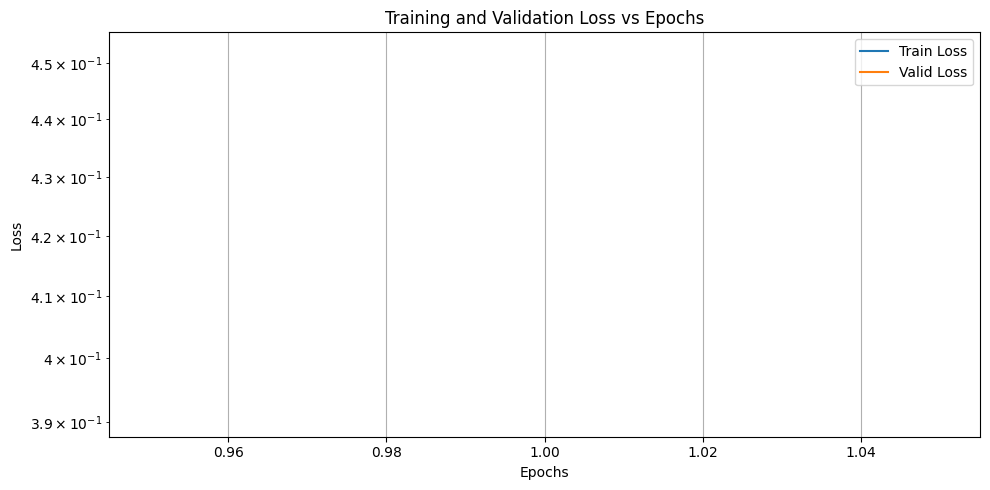

In [11]:
# model = load_model(f"{_exp_name}_best.ckpt")
model, train_losses, valid_losses = try_load_model_ViT(_exp_name)
feature_extractor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
plot_losses(train_losses, valid_losses)

## Evaluation

100%|██████████| 125/125 [01:44<00:00,  1.20it/s]


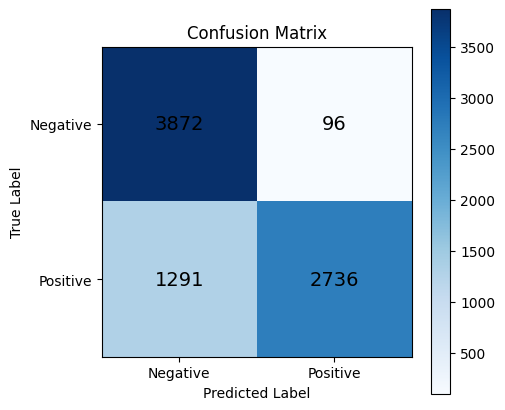

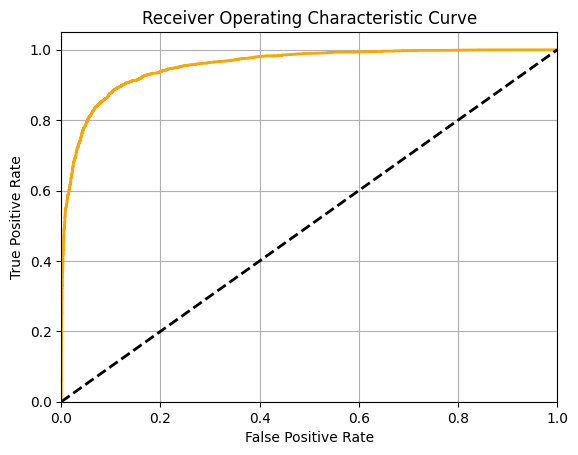

Test Accuracy: 0.8265
F1 Score: 0.7978
F2 Score: 0.7223
AUC: 0.9549


(np.float64(0.8265165728580363),
 np.float64(0.7977839335180055),
 np.float64(0.7222808870116155),
 np.float64(0.9548944323397711))

In [14]:
evaluate_model_ViT(model, test_loader, feature_extractor)